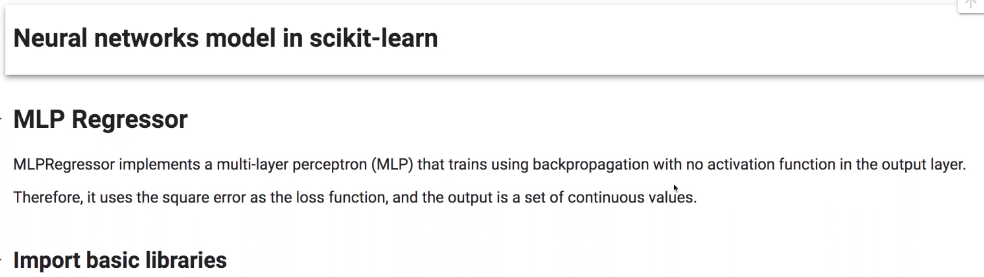

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

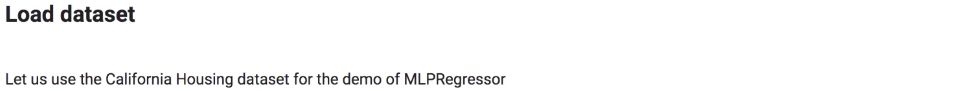

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

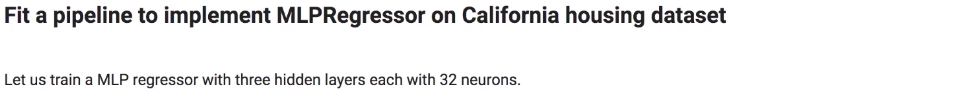

In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(hidden_layer_sizes=(32))),
])

cv_results = cross_validate(
    pipe,
    X_train,
    y_train,
    cv=cv,
    scoring='neg_mean_absolute_percentage_error',
    return_train_score=True,
    return_estimator=True,
    n_jobs=2
)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f'Mean absolute error of linear regression model on the train set:\n'
      f'{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}')
print(f'Mean absolute error of linear regression model on the test set:\n'
      f'{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}')

Mean absolute error of linear regression model on the train set:
0.217 +/- 0.001
Mean absolute error of linear regression model on the test set:
0.217 +/- 0.007


In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [7]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train))

0.20517616916407086

In [8]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

0.21680164186883186

Text(0, 0.5, 'predicted')

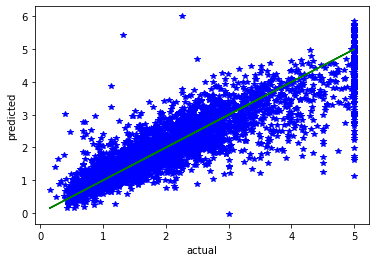

In [9]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')

In [12]:
pipe[-1].out_activation_

'identity'